In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
games = pd.read_csv('games.csv', index_col='Rank')

In [4]:
# check the shape and data types

print(games.shape, end='\n\n')
print(games.dtypes)

(16598, 10)

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [5]:
# are we have some NaN values?
games.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Task 1

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [81]:
games.isna().sum()
print('Answer:', max(games.isna().sum()), 'in Year')

Answer: 271 in Year


In [82]:
games_without_na = games.dropna()

In [83]:
games_without_na

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


### Task 2

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [84]:
print('Answer:\n', games_without_na.Year.describe(), sep='')

Answer:
count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

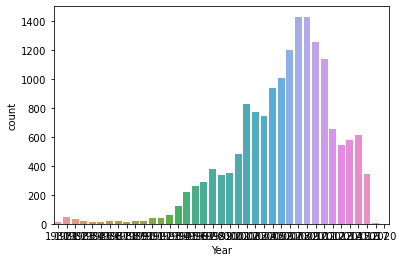

In [85]:
games_without_na.Year = games_without_na.Year.astype('int')
sns.countplot(games_without_na.Year)

In [86]:
games_without_na.query('Year > 2007').shape[0]/games_without_na.shape[0]

0.4906390031305629

### Task 3

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [95]:
freq_platform = games_without_na.groupby('Platform', as_index=False)\
                    .agg({'Year' : 'count'})\
                    .rename(columns={'Year' : 'counts'})

In [96]:
total_plats = games_without_na.Platform.count()

In [104]:
freq_platform['freq'] = freq_platform.counts / total_plats * 100

In [119]:
print('Answer:', *list(freq_platform.query('freq > 7').sort_values(by='freq', ascending=False).Platform))

Answer: DS PS2 PS3 Wii X360 PSP PS


### Task 4

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [141]:
games_without_na.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Quintet                            1
Playmore                           1
Paon Corporation                   1
Kool Kizz                          1
Karin Entertainment                1
Name: Publisher, Length: 576, dtype: int64

In [146]:
import scipy
scipy.stats.mode(games_without_na.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

### Task 5

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

In [151]:
games_without_na.query('Publisher == "Nintendo"').describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


### Task 6

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)

по оси у – объем продаж в Японии (JP_sales)

Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

In [161]:
from matplotlib import pyplot as plt

games_nintendo = games_without_na.query('Publisher == "Nintendo"')

In [162]:
games_nintendo_JP = games_nintendo[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'JP_Sales']]

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

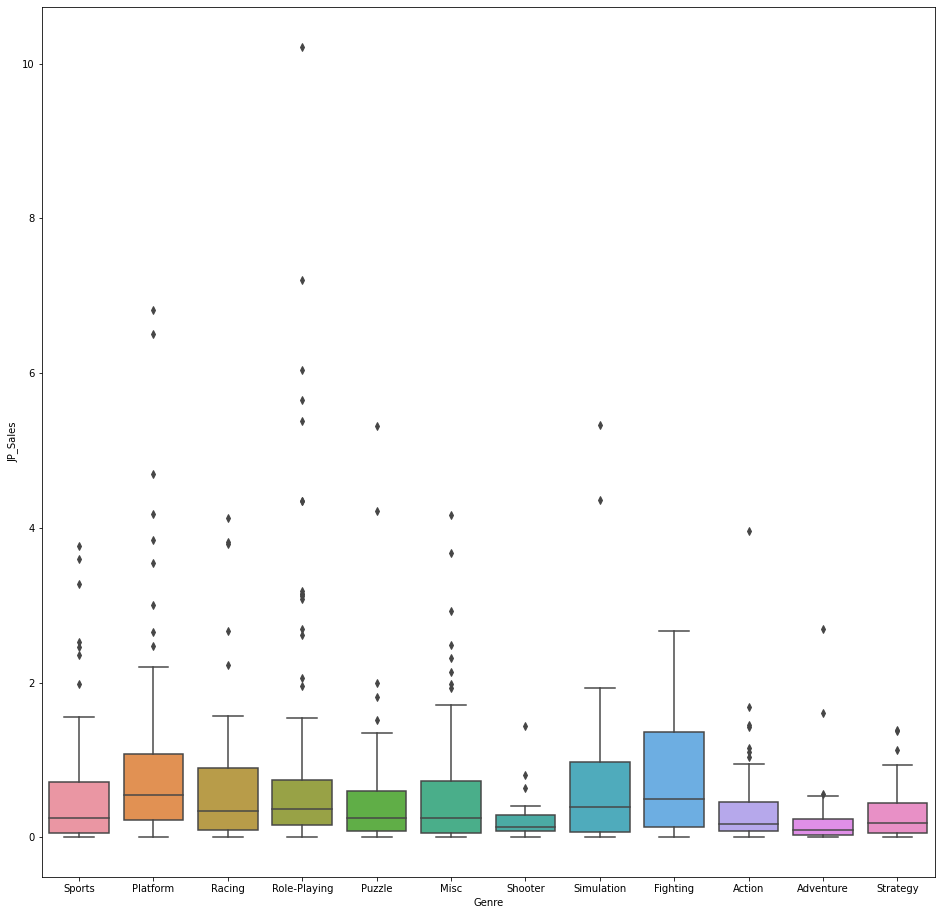

In [164]:
plt.figure(figsize=(16,16))
sns.boxplot(x='Genre', y='JP_Sales', data=games_nintendo_JP)

Answer:

Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation

Наибольший межквартильный размах наблюдается у игр жанра Fighting

Межквартильный размах у Strategy меньше, чем у Puzzle

### Task 7

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков.

In [169]:
global_sales_nintendo = games_without_na.query('Publisher == "Nintendo"')\
                            [['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']]\
                            .query('Genre in ("Fighting", "Simulation", "Platform", "Racing", "Sports")')

In [173]:
global_sales_nintendo = global_sales_nintendo.groupby(['Genre', 'Year'], as_index=False).sum()

<AxesSubplot:xlabel='Year', ylabel='Genre'>

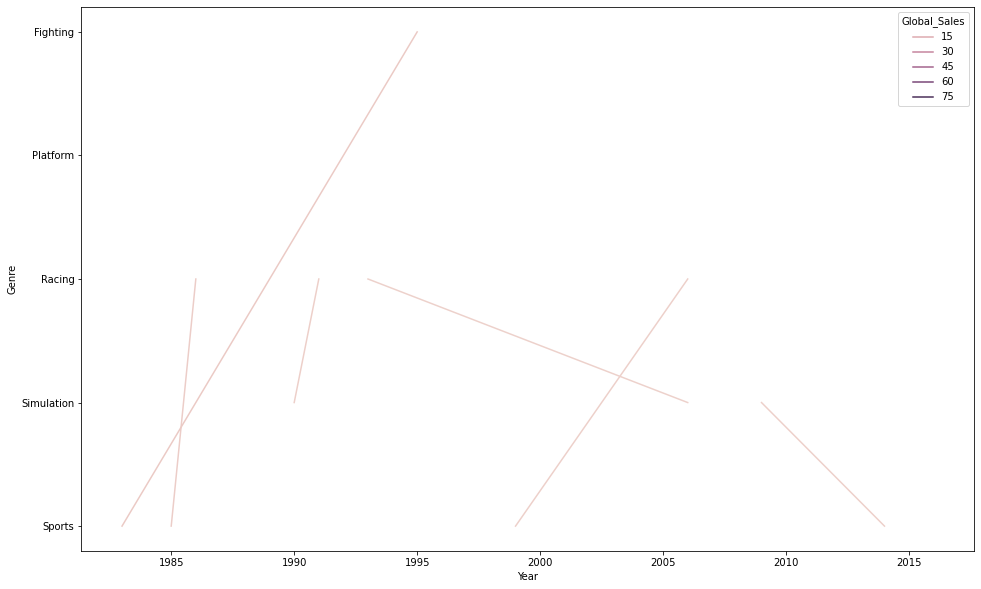

In [177]:
plt.figure(figsize=(16,10))
sns.lineplot(x='Year', y='Genre', hue='Global_Sales', data=global_sales_nintendo)

Answer: 2005-2010